## Import Libraries

### model 8 - Adding Image Augmentation to improve accuracy

#### Target:
1. Inorder to increase the accuracy, Image augmentation can be added

#### Results:
Total parameters: 7,598
Best Training Accuracy - 98.63 at the 15th Epoch
Best Testing Accuracy - 99.26 at the 15th epoch

#### Analysis:
1. Random Rotation between -6.9 and 6.9 degrees. Introducing this variation in the dataset has improved the test accuracy from 99.20 in previous model to 99.26 in this model.
2. This model seems to be performing consistent for the test data

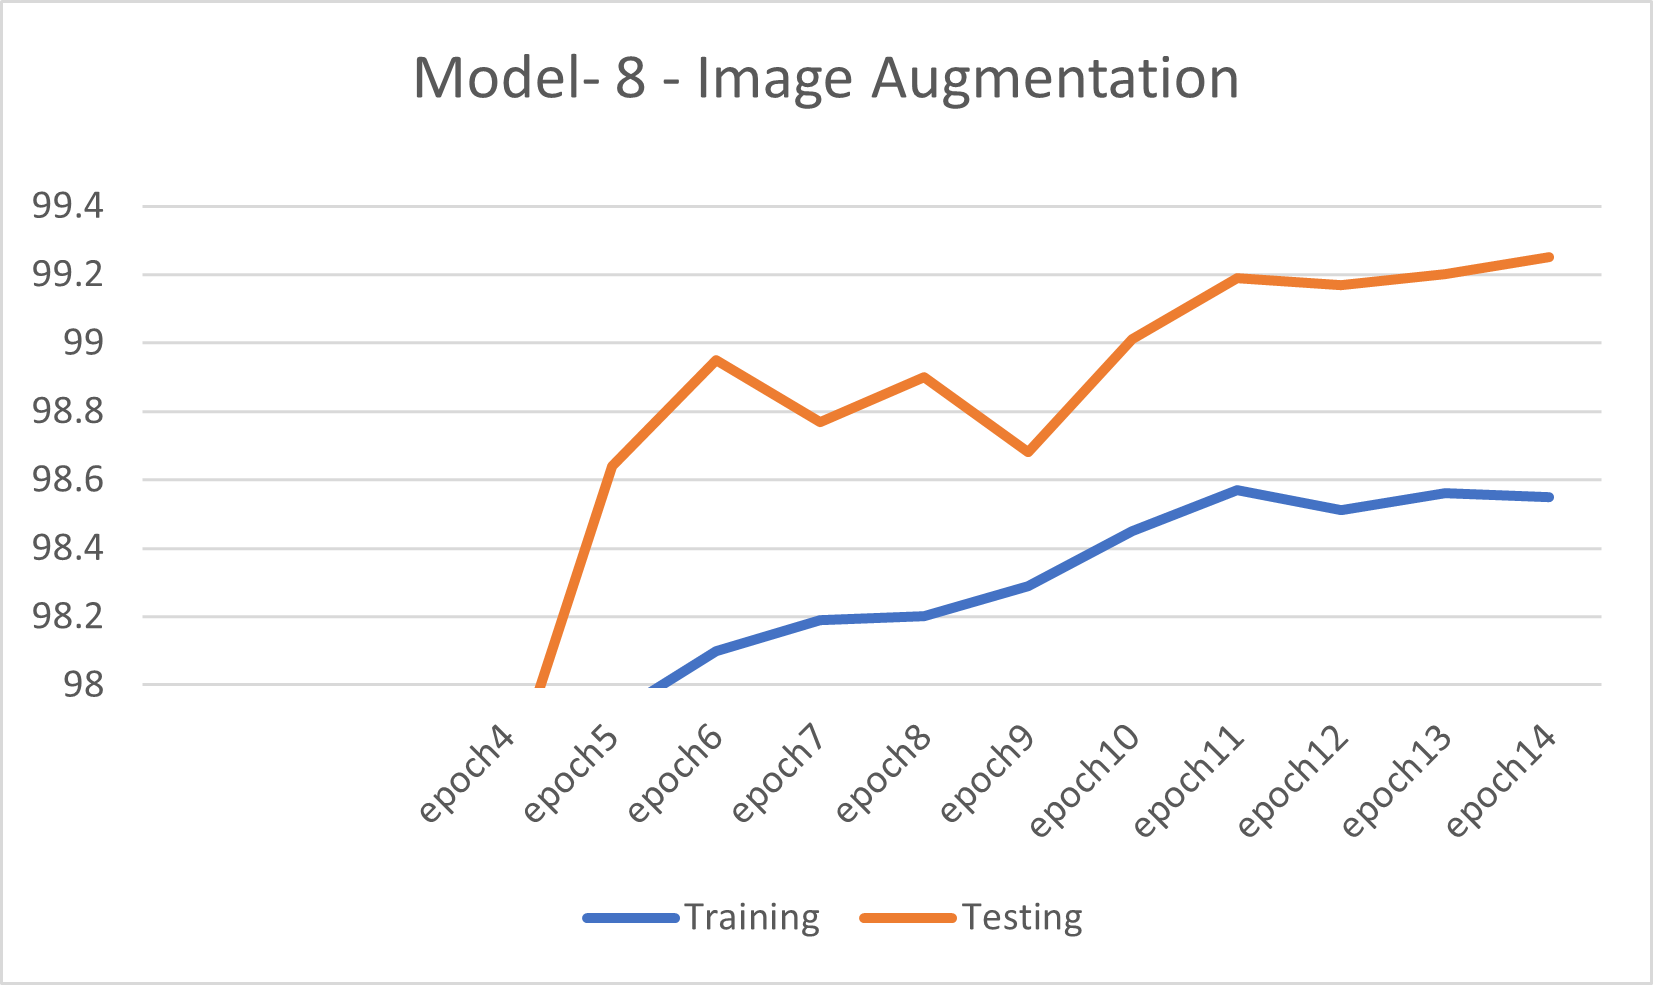

In [1]:
from __future__ import print_function
import torch
# import torch.nn as nn
# import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms
from utils import train_test_dataloader
import models
from models import model_summary, train, test, plot_accuracy_loss, model7

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.


In [2]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device: ", device)


# Train Phase transformations
train_transformer = [transforms.RandomRotation((-6.9, 6.9), fill=(1,)),
                    transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,)) # The mean and std have to be sequences (e.g., tuples), therefore you should add a comma after the values.
                                       ]

# Test Phase transformations
test_transformer = [transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]


# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train and test dataloader
train_loader,test_loader = train_test_dataloader(train_transformer, test_transformer, dataloader_args)

CUDA Available? True
Device:  cuda


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The model
Let's start with the model we first saw

# Model Params
Can't emphasize on how important viewing Model Summary is.
Unfortunately, there is no in-built model visualizer, so we have to take external help

In [3]:
# sending model to device
model = model7().to(device)

# Generating model summary
model_summary(model,(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 10, 28, 28]              90
       BatchNorm2d-2           [-1, 10, 28, 28]              20
              ReLU-3           [-1, 10, 28, 28]               0
           Dropout-4           [-1, 10, 28, 28]               0
            Conv2d-5           [-1, 12, 28, 28]           1,080
       BatchNorm2d-6           [-1, 12, 28, 28]              24
              ReLU-7           [-1, 12, 28, 28]               0
           Dropout-8           [-1, 12, 28, 28]               0
         MaxPool2d-9           [-1, 12, 14, 14]               0
           Conv2d-10           [-1, 10, 14, 14]             120
             ReLU-11           [-1, 10, 14, 14]               0
           Conv2d-12           [-1, 16, 12, 12]           1,440
      BatchNorm2d-13           [-1, 16, 12, 12]              32
             ReLU-14           [-1, 16,

# Training and Testing

Looking at logs can be boring, so we'll introduce **tqdm** progressbar to get cooler logs.

Let's write train and test functions

# Let's Train and test our model

In [4]:
model =  model7().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

EPOCH: 0


Loss=0.16666972637176514 Batch_id=468 Accuracy=75.30: 100%|██████████| 469/469 [00:25<00:00, 18.15it/s]



Test set: Average loss: 0.1482, Accuracy: 9674/10000 (96.74%)

EPOCH: 1


Loss=0.11069837957620621 Batch_id=468 Accuracy=96.22: 100%|██████████| 469/469 [00:26<00:00, 17.91it/s]



Test set: Average loss: 0.0743, Accuracy: 9797/10000 (97.97%)

EPOCH: 2


Loss=0.06694119423627853 Batch_id=468 Accuracy=97.28: 100%|██████████| 469/469 [00:26<00:00, 17.87it/s]



Test set: Average loss: 0.0742, Accuracy: 9771/10000 (97.71%)

EPOCH: 3


Loss=0.03646141290664673 Batch_id=468 Accuracy=97.65: 100%|██████████| 469/469 [00:26<00:00, 17.83it/s]



Test set: Average loss: 0.0726, Accuracy: 9770/10000 (97.70%)

EPOCH: 4


Loss=0.06921494007110596 Batch_id=468 Accuracy=97.91: 100%|██████████| 469/469 [00:25<00:00, 18.11it/s]



Test set: Average loss: 0.0444, Accuracy: 9864/10000 (98.64%)

EPOCH: 5


Loss=0.042584847658872604 Batch_id=468 Accuracy=98.10: 100%|██████████| 469/469 [00:26<00:00, 18.02it/s]



Test set: Average loss: 0.0358, Accuracy: 9895/10000 (98.95%)

EPOCH: 6


Loss=0.043954987078905106 Batch_id=468 Accuracy=98.19: 100%|██████████| 469/469 [00:25<00:00, 18.30it/s]



Test set: Average loss: 0.0434, Accuracy: 9877/10000 (98.77%)

EPOCH: 7


Loss=0.08286749571561813 Batch_id=468 Accuracy=98.20: 100%|██████████| 469/469 [00:25<00:00, 18.57it/s]



Test set: Average loss: 0.0346, Accuracy: 9890/10000 (98.90%)

EPOCH: 8


Loss=0.08143685013055801 Batch_id=468 Accuracy=98.29: 100%|██████████| 469/469 [00:26<00:00, 17.50it/s]



Test set: Average loss: 0.0429, Accuracy: 9868/10000 (98.68%)

EPOCH: 9


Loss=0.0546448640525341 Batch_id=468 Accuracy=98.45: 100%|██████████| 469/469 [00:25<00:00, 18.36it/s]



Test set: Average loss: 0.0327, Accuracy: 9901/10000 (99.01%)

EPOCH: 10


Loss=0.028583845123648643 Batch_id=468 Accuracy=98.57: 100%|██████████| 469/469 [00:25<00:00, 18.42it/s]



Test set: Average loss: 0.0288, Accuracy: 9919/10000 (99.19%)

EPOCH: 11


Loss=0.02182195335626602 Batch_id=468 Accuracy=98.51: 100%|██████████| 469/469 [00:25<00:00, 18.38it/s]



Test set: Average loss: 0.0258, Accuracy: 9917/10000 (99.17%)

EPOCH: 12


Loss=0.031330738216638565 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:25<00:00, 18.19it/s]



Test set: Average loss: 0.0265, Accuracy: 9920/10000 (99.20%)

EPOCH: 13


Loss=0.02058097906410694 Batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:25<00:00, 18.15it/s]



Test set: Average loss: 0.0267, Accuracy: 9925/10000 (99.25%)

EPOCH: 14


Loss=0.06100204959511757 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:25<00:00, 18.06it/s]



Test set: Average loss: 0.0219, Accuracy: 9926/10000 (99.26%)



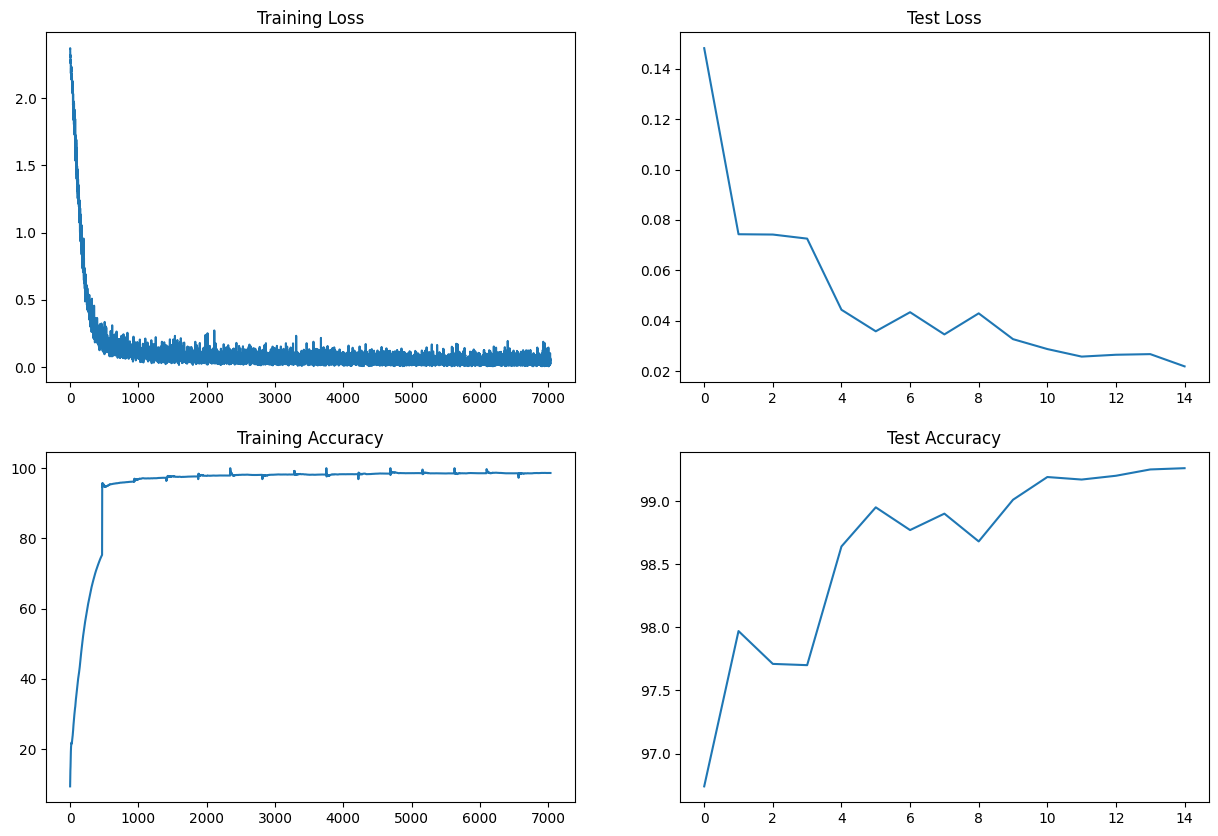

In [5]:
plot_accuracy_loss()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


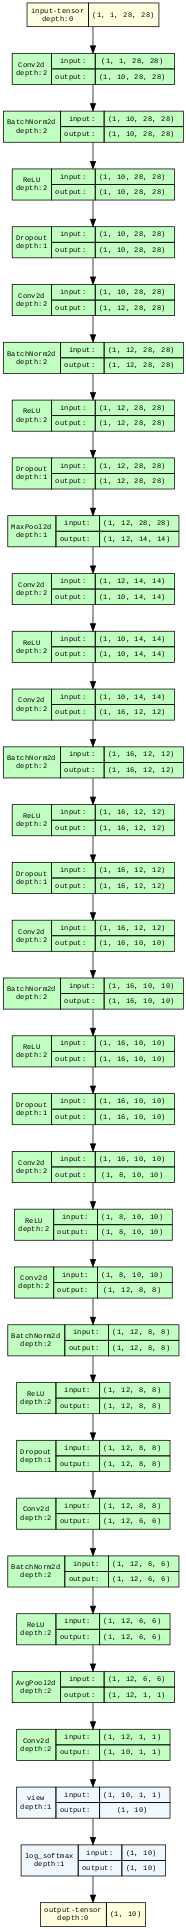

In [6]:
import torchvision
!pip install torchview
from torchview import draw_graph
import graphviz
graphviz.set_jupyter_format('png')
model_graph = draw_graph(model7(), input_size=(1,1,28,28), expand_nested=False)
model_graph.visual_graph